In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

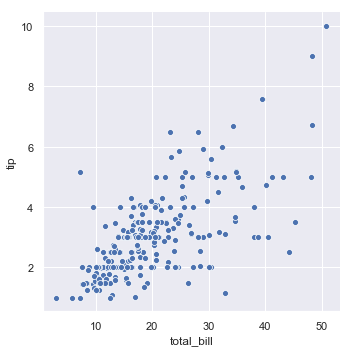

In [3]:
# 기존 데이터 tips를 입력데이터셋으로 함.
tips= sns.load_dataset("tips")

# 그래프를 그린다 sns.relplot( xlabel, ylabel, 입력 데이터셋)
sns.relplot(x='total_bill', y='tip', data=tips)

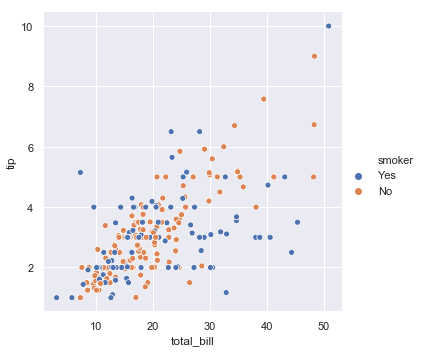

In [4]:
# hue는 오른쪽 smoker yes/no를 나타낸다. 
# 위의 그래프는 그냥 tips와 total_bill과의 관계를 나타낸다면

# 두가지 색깔로 구분한 것은 그 point가 smoker냐 아니냐를 의미한다.
# 그래프 x축: total bill
# 그래프 y축: tip
# 점의 색깔: smoker여부
sns.relplot( x='total_bill', y='tip', hue='smoker', data=tips)

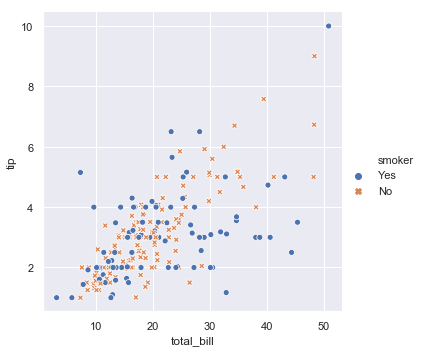

In [5]:
# smoke여부의 기준으로 그래프 위의 점의 style 모양을 나타낸다.
# 그래프 x축: total_bill
# 그래프 y축: tip
# 점의 색깔: smoker여부 , style: smoker여부에 따라 모양이 다양함.
sns.relplot(x='total_bill', y='tip', hue='smoker', 
            style='smoker', data=tips)

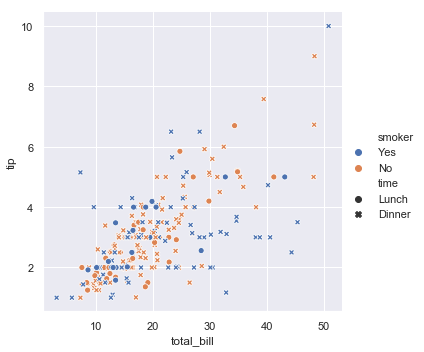

In [6]:
# 각 점들의 hue와 style을 변화시킴으로써, 4개의 variables로 나타낼 수 있다.
#  눈은 색깔보다 모양에 덜 민감하기때문에 주의해야한다.

# 그래프 x축: total_bill
# 그래프 y축: tip
# 점의 색깔: smoker여부
# 그래프 모양: time에 따라.. time에서도 lunch와 dinner로 구분됨.
#               lunch이냐 dinner에 따라 모양이 다름.
sns.relplot(x='total_bill', y='tip', hue='smoker', 
            style='time', data=tips)

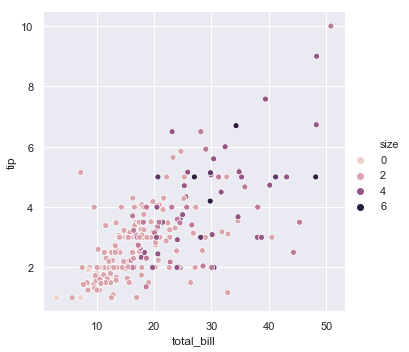

In [7]:
# 위의 예시에서 hue semantic은 default 팔레트가 적용됨.
# default color는 sequential palette로 바꿀 수 있다.
# x축: total_bill
# y축: tip
# 점의 색깔(hue): size는 0,2,4,6 으로 4가지로 구분함.

## 위의 예시, hue='smoker'인 경우에는 yes와 no로 2가지로 구분함.               
sns.relplot(x='total_bill', y='tip', hue='size', data=tips)

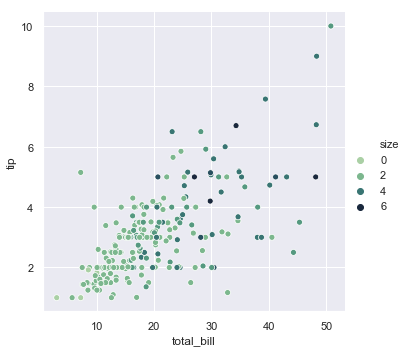

In [10]:
# 컬러 팔렛트를 원하는대로 바꿀 수 있다.

# cubehelix_palette()에 접근하는 문자열을 사용함으로써
# sequential palette를 바꿀 수 있다.
sns.relplot(x='total_bill', y='tip',hue='size', 
            palette="ch:r=-.5,l=.75", data=tips)

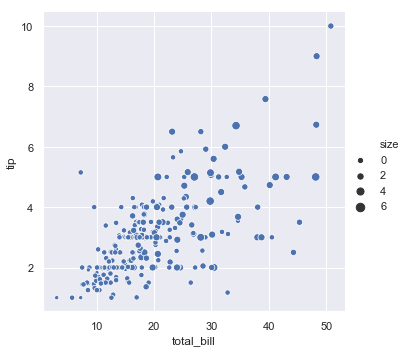

In [11]:
# semantic variable의 종류는 각 점들의 사이즈를 바꿀 수 있다.
sns.relplot( x= 'total_bill', y='tip', size='size', data=tips)

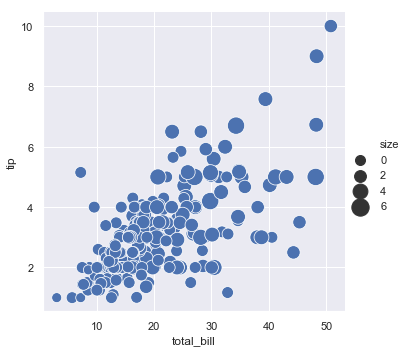

In [16]:
# matplotlib.pyplot.scatter()과 다르게
# variable의 리터럴 값은 각 점의 영역을 선택하는데 사용하지 않는다.
# 데이터 단위에서의 값의 범위는 영역 단위의 범위에서 평준화 된다.
# 여기서는 데이터 단위에서의 값의 범위가 바뀐 것이다.

# 여기서는 palette가 먹히지 않는다..

sns.relplot(x='total_bill', y='tip', 
            size='size', sizes=(100,300), data=tips)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

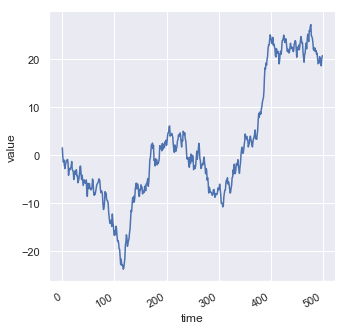

In [18]:
#lineplot() : 시간에 대한 함수로서 하나의 variable에서의 변화를 이해
# 연속적인 variable에서

#연속적인 그래프 확보
df= pd.DataFrame(   dict(time=np.arange(500), 
                            value=np.random.randn(500).cumsum()))

#그래프를 그린다.
g= sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()

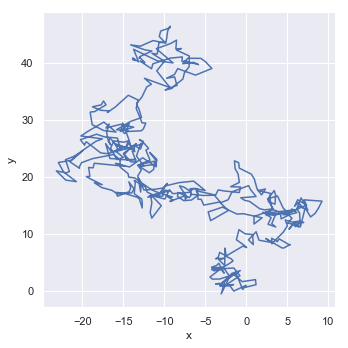

In [19]:
df=pd.DataFrame(np.random.randn(500,2).cumsum(axis=0),
               columns=['x','y'])

sns.relplot(x='x', y='y',sort=False, kind='line', data=df)

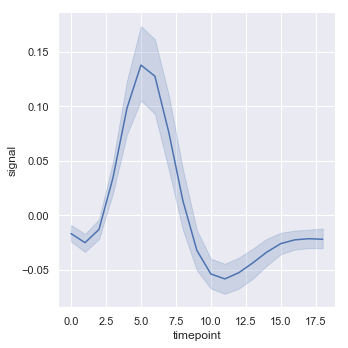

In [21]:
# 불확실함을 집합화 와 표현화
fmri= sns.load_dataset("fmri")
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

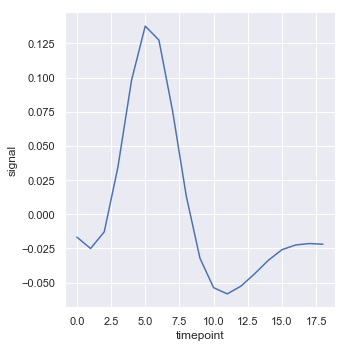

In [22]:
# ci: 불확실한 부분을 의미
# ci=None은 선 주변의 음영표시(불학실함 표시)를 없앰.
sns.relplot(x='timepoint', y='signal', ci=None, 
           kind='line', data=fmri)

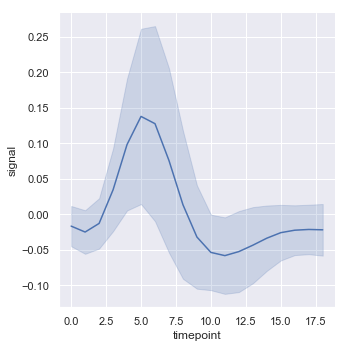

In [24]:
# ci (불확실한 부분) 을 더 두껍게 할 수 있다.
# x축은 timepoint 컬럼에 해당하는 데이터들을 의미 
# x='time point' 했더니 오류뜸.
sns.relplot(x='timepoint', y='signal', ci="sd",
           kind='line', data=fmri)

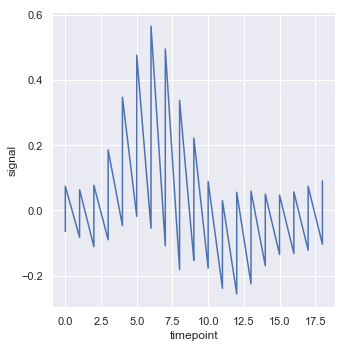

In [26]:
#각 점에서 다양한 관찰한 데이터
# esimator=None이라면.. 뾰족뾰족한 그래프가..
# 영역까지 선으로 표현.
sns.relplot(x='timepoint', y='signal', estimator=None,
           kind='line', data=fmri)

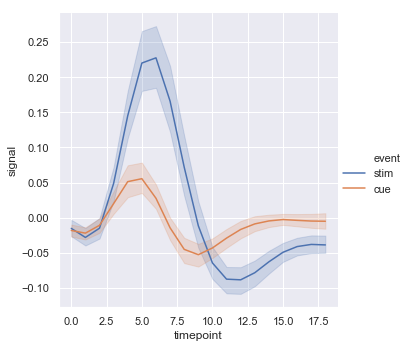

In [27]:
# hue로 또 구분함
# x축: timepoint
# y축: signal
# 색깔: event 종류 (stim / cue)
sns.relplot(x='timepoint', y='signal', hue='event', 
            kind='line', data=fmri)

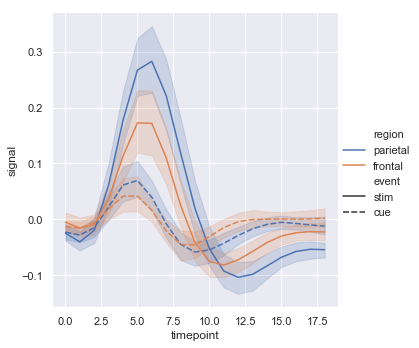

In [31]:
# 마커로 subset(부분집합)을 표현가능 - 각각의 관측에서 사용됨..
# dash로 점들을 이어준다.

# hue가 region으로 2개의 그래프를 나타냄(파랑: parietal, 빨강:frontal)

# style가 event으로 2개의 그래프를 나타냄(실선: stim , 점선:cue)
sns.relplot( x= 'timepoint', y='signal', hue='region',
           style='event', kind='line', data=fmri)

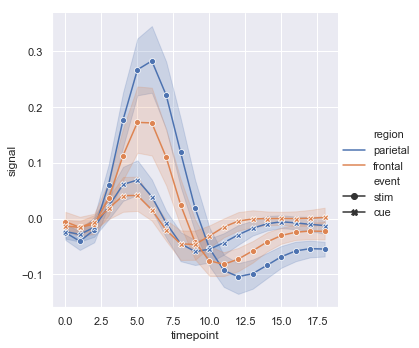

In [32]:
# dashes=False 시킨 결과, markers=True =>  선 모양으로 구분.
sns.relplot(x='timepoint', y='signal', hue='region',
           style='event', dashes=False, markers=True,
           kind='line', data=fmri)

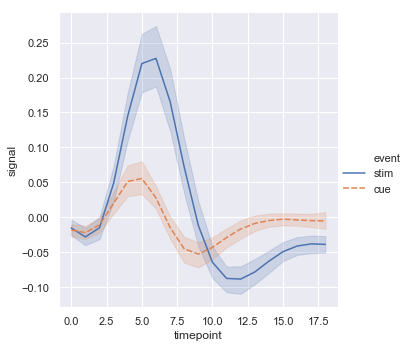

In [33]:
# event 에 따라 색깔도, 선모양도 모두 다르게 나타냄
# event가 stim => 파란선/실선
#         cue => 빨간선/ 점선
sns.relplot(x='timepoint', y='signal', hue='event',
           style='event', kind='line', data=fmri)

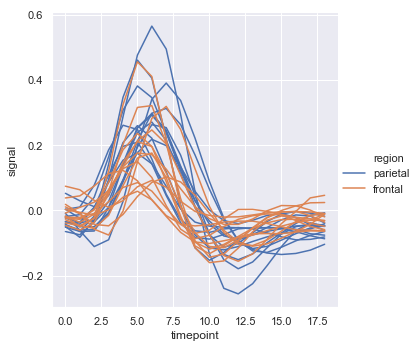

In [37]:
sns.relplot(x='timepoint', y='signal', hue='region',
           units='subject', estimator=None,
           kind='line', data=fmri.query("event == 'stim'"))

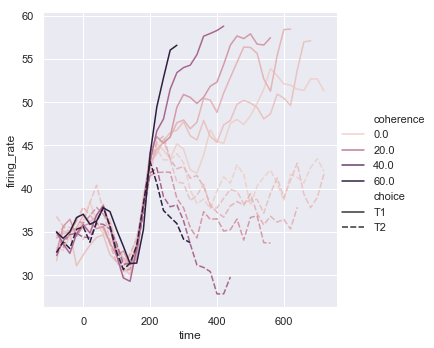

In [38]:
dots= sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x='time', y='firing_rate',
           hue='coherence', style='choice',
           kind='line', data=dots)

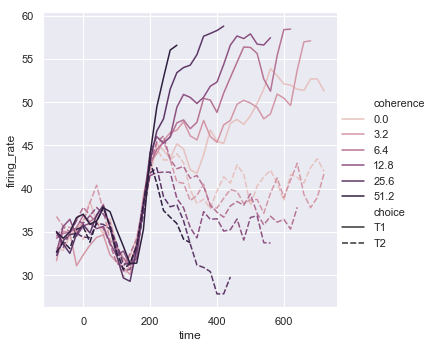

In [39]:
palette= sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot( x='time', y='firing_rate',
           hue='coherence', style='choice',
           palette=palette,
           kind='line', data=dots)

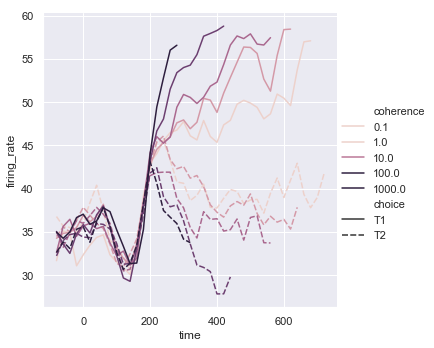

In [40]:
from matplotlib.colors import LogNorm
palette= sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot( x='time', y='firing_rate',
           hue='coherence', style='choice',
           hue_norm=LogNorm(),
           kind='line', data=dots)

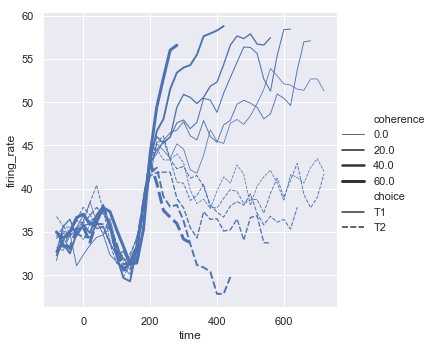

In [41]:
sns.relplot(x='time', y='firing_rate',
           size='coherence', style='choice',
           kind='line', data=dots)

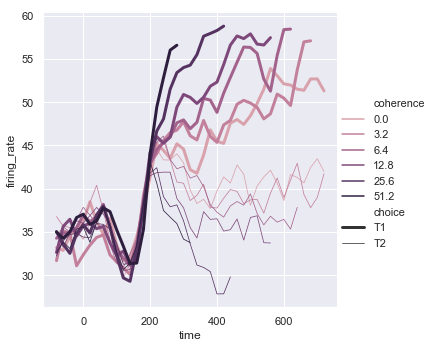

In [42]:
sns.relplot(x='time', y='firing_rate',
           hue='coherence', size='choice',
           palette=palette,
           kind='line', data=dots)

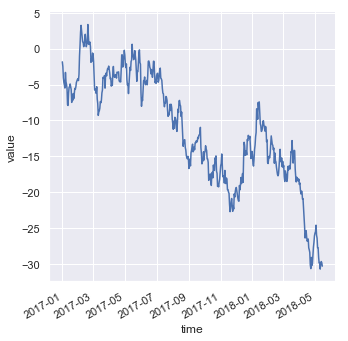

In [44]:
df=pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500), 
                    value=np.random.randn(500).cumsum()))

g=sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()

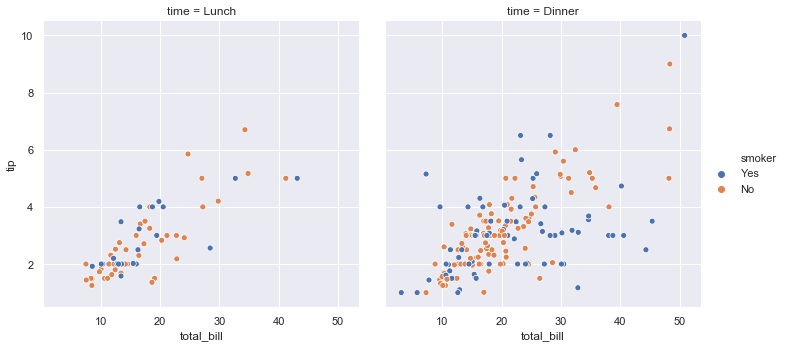

In [45]:
sns.relplot(x='total_bill', y='tip', hue='smoker',
           col='time', data=tips)

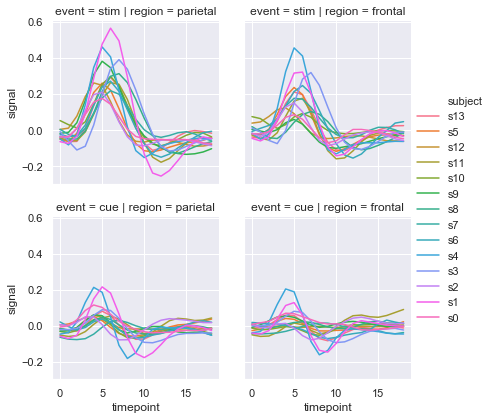

In [46]:
sns.relplot( x= 'timepoint', y='signal', hue='subject',
           col='region', row='event', height=3,
           kind='line', estimator=None, data=fmri)

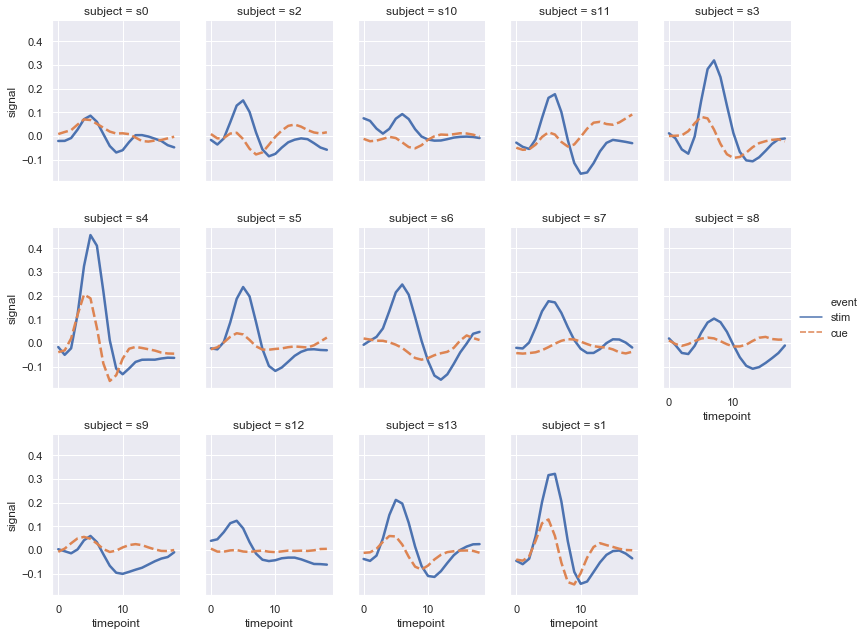

In [47]:
sns.relplot(x='timepoint', y='signal', hue='event',
           style='event', col='subject', col_wrap=5,
           height=3, aspect=.75, linewidth=2.5,
           kind='line', data=fmri.query("region=='frontal'"))